In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scape
import katdal
import katpoint
import katsdpscripts
import glob
import re
import pandas as pd 

import csv
import operator

INFO: Generating grammar tables from /usr/lib/python2.7/lib2to3/Grammar.txt
INFO: Generating grammar tables from /usr/lib/python2.7/lib2to3/PatternGrammar.txt


In [3]:
from os import system

In [4]:
print "Scape version: %s"%scape.__version__
print "katdal version: %s"%katdal.__version__
print "katpoint version: %s"%katpoint.__version__
print "katsdpscripts version: %s"%katsdpscripts.__version__

Scape version: 0.1.dev616+master.e836eb2
katdal version: 0.9.6.dev634+master.5ac4d48
katpoint version: 0.8.dev355+master.341001f
katsdpscripts version: 0.1.dev2714+master.9a3f2f2


In [5]:
h5_filename ='/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/02/26/1519661019.h5'
%set_env h5_filename = $h5_filename

env: h5_filename=/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/02/26/1519661019.h5


In [6]:
d = katdal.open(h5_filename);
ant_list,ants = [],[]
[ant_list.append(ant.name) for ant in d.ants]
print(ant_list)

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1519658639.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
DEBUG: Added '0008-421' [radec] (and 1 aliases)
DEBUG: Added '0023-263' [radec] (and 1 aliases)
DEBUG: Added '0056-001' [radec] (and 1 aliases)
DEBUG: Added '0237-233' [radec] (and 1 aliases)
DEBUG: Added '0252-712' [radec] (and 1 aliases)
DEBUG: Added 'CTA21' [radec] (and 1 aliases)
DEBUG: Added '0408-658' [radec] (and 1 aliases)
DEBUG: Added '0428+205' [radec] (and 1 aliases)
DEBUG: Added '3C138' [radec] (and 1 aliases)
DEBUG: Added '0537-441' [radec] (and 1 aliases)
DEBUG: Added '0614-349' [radec] (and 1 aliases)
DEBUG: Added '0723-008' [radec] (and 1 aliases)
DEBUG: Added 

In [7]:
#ant_list.remove('m020') # not tracking most of the time
ants=','.join(ant_list)
print ants
%set_env ants=$ants

m002,m006,m007,m008,m009,m010,m012,m013,m015,m016,m017,m018,m032,m034,m035,m041
env: ants=m002,m006,m007,m008,m009,m010,m012,m013,m015,m016,m017,m018,m032,m034,m035,m041


In [8]:
ref_ant='m006'
%set_env ref_ant=$ref_ant

env: ref_ant=m006



Loading and processing data...

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1519658639.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
antennas (16): m002, m006 (*ref*), m007, m008, m009, m010, m012, m013, m015, m016, m017, m018, m032, m034, m035, m041 [pol H]
baselines (120): 0-1 0-2 1-2 0-3 1-3 2-3 0-4 1-4 2-4 3-4 0-5 1-5 2-5 3-5 4-5 0-6 1-6 2-6 3-6 4-6 5-6 0-7 1-7 2-7 3-7 4-7 5-7 6-7 0-8 1-8 2-8 3-8 4-8 5-8 6-8 7-8 1-9 2-9 3-9 4-9 5-9 6-9 7-9 8-9 2-10 3-10 4-10 5-10 6-10 7-10 8-10 9-10 3-11 4-11 5-11 6-11 7-11 8-11 9-11 10-11 4-12 5-12 6-12 7-12 8-12 9-12 10-12 11-12 5-13 6-13 7-13 8-13 9-13 10-13 11-13 12-13 6-14 7-14 8-14 9-14 10-14 11-14 12-14 13-14 7-15 8-15 9-15 10-15 

scan  19 (  16 samples) 0.038 0.040 0.038 0.041 0.039 0.040 0.041 0.039 0.051 0.040 0.039 0.037 0.038 0.047 0.042 0.039 0.038 0.074 0.042 0.115 0.039 0.038 0.037 0.039 0.040 0.040 0.038 0.040 0.065 0.054 0.038 0.037 0.038 0.036 0.038 0.036 0.041 0.039 0.040 0.041 0.039 0.040 0.046 0.044 0.038 0.039 0.040 0.038 0.040 0.038 0.036 0.039 0.040 0.040 0.038 0.039 0.038 0.050 0.045 0.039 0.039 0.038 0.038 0.037 0.036 0.038 0.038 0.039 0.037 0.039 0.038 0.037 0.039 0.039 0.040 0.039 0.039 0.037 0.103 0.274 0.039 0.053 0.037 0.038 0.038 0.036 0.039 0.038 0.039 0.038 0.039 0.038 0.066 0.040 0.042 0.039 0.040 0.041 0.039 0.038 0.042 0.037 0.038 0.041 0.037 0.040 0.038 0.039 0.038 0.038 0.039 0.040 0.039 0.041 0.041 0.040 0.040 0.037 0.039 0.039 '0537-441'
scan  20 (   3 samples) skipped 'slew'
scan  21 (  16 samples) 0.053 0.055 0.054 0.057 0.056 0.055 0.058 0.055 0.060 0.060 0.056 0.054 0.056 0.058 0.058 0.055 0.056 0.055 0.058 0.063 0.055 0.056 0.052 0.054 0.057 0.056 0.053 0.055 0.052 0.051 0.

scan  41 (  16 samples) 0.028 0.028 0.027 0.029 0.028 0.029 0.029 0.028 0.029 0.029 0.027 0.026 0.027 0.041 0.027 0.028 0.028 0.030 0.029 0.030 0.028 0.027 0.027 0.028 0.028 0.029 0.026 0.028 0.026 0.026 0.025 0.027 0.027 0.026 0.027 0.026 0.028 0.028 0.029 0.028 0.028 0.028 0.028 0.032 0.028 0.029 0.029 0.028 0.029 0.028 0.027 0.031 0.028 0.029 0.027 0.028 0.027 0.026 0.030 0.028 0.029 0.027 0.028 0.027 0.027 0.028 0.027 0.028 0.027 0.028 0.027 0.026 0.027 0.029 0.027 0.028 0.027 0.027 0.026 0.030 0.027 0.027 0.026 0.027 0.027 0.027 0.028 0.028 0.028 0.027 0.028 0.027 0.030 0.028 0.027 0.028 0.028 0.027 0.028 0.028 0.028 0.027 0.028 0.027 0.027 0.027 0.027 0.028 0.027 0.027 0.028 0.029 0.028 0.028 0.029 0.028 0.029 0.027 0.027 0.028 '0252-712'
scan  42 (  10 samples) skipped 'slew'
scan  43 (  15 samples) 0.020 0.022 0.021 0.022 0.021 0.021 0.022 0.022 0.021 0.023 0.021 0.020 0.022 0.022 0.022 0.022 0.022 0.022 0.023 0.023 0.022 0.022 0.021 0.021 0.022 0.022 0.021 0.021 0.020 0.020 0.

scan  63 (  16 samples) 0.039 0.037 0.038 0.039 0.038 0.039 0.039 0.040 0.038 0.042 0.037 0.037 0.037 0.038 0.039 0.039 0.037 0.038 0.038 0.041 0.037 0.037 0.037 0.037 0.037 0.038 0.036 0.039 0.036 0.035 0.037 0.037 0.036 0.036 0.037 0.035 0.038 0.038 0.039 0.039 0.039 0.040 0.038 0.036 0.037 0.040 0.039 0.037 0.039 0.037 0.036 0.041 0.039 0.040 0.038 0.040 0.037 0.036 0.037 0.038 0.039 0.037 0.039 0.036 0.036 0.037 0.038 0.038 0.038 0.039 0.037 0.036 0.039 0.038 0.039 0.039 0.038 0.036 0.034 0.037 0.037 0.036 0.037 0.038 0.036 0.036 0.038 0.038 0.038 0.038 0.038 0.037 0.039 0.037 0.038 0.038 0.038 0.038 0.039 0.037 0.038 0.037 0.037 0.036 0.036 0.039 0.037 0.039 0.037 0.039 0.039 0.040 0.038 0.038 0.040 0.038 0.040 0.037 0.036 0.039 '0008-421'
scan  64 (   3 samples) skipped 'slew'
scan  65 (  15 samples) 0.021 0.020 0.022 0.021 0.022 0.020 0.023 0.020 0.022 0.022 0.021 0.020 0.020 0.021 0.022 0.021 0.021 0.021 0.021 0.022 0.022 0.021 0.019 0.021 0.022 0.021 0.020 0.021 0.021 0.019 0.

scan  85 (  15 samples) 0.068 0.070 0.071 0.077 0.073 0.076 0.073 0.072 0.072 0.075 0.072 0.070 0.068 0.073 0.074 0.070 0.070 0.077 0.076 0.075 0.074 0.071 0.069 0.068 0.071 0.072 0.068 0.071 0.067 0.065 0.069 0.070 0.071 0.068 0.070 0.066 0.072 0.072 0.072 0.074 0.072 0.074 0.070 0.076 0.070 0.073 0.074 0.068 0.074 0.069 0.068 0.073 0.075 0.074 0.071 0.071 0.068 0.070 0.071 0.068 0.073 0.069 0.072 0.069 0.069 0.073 0.071 0.069 0.072 0.073 0.068 0.068 0.072 0.071 0.070 0.073 0.072 0.070 0.065 0.077 0.071 0.069 0.069 0.076 0.067 0.069 0.071 0.071 0.071 0.071 0.074 0.070 0.075 0.072 0.071 0.074 0.072 0.071 0.072 0.069 0.069 0.068 0.073 0.067 0.068 0.071 0.071 0.072 0.070 0.069 0.071 0.075 0.071 0.073 0.077 0.073 0.076 0.070 0.068 0.071 '0733-174'
scan  86 (   7 samples) skipped 'slew'
scan  87 (  15 samples) 0.031 0.030 0.028 0.031 0.029 0.031 0.031 0.030 0.031 0.032 0.030 0.029 0.029 0.030 0.029 0.031 0.029 0.031 0.031 0.031 0.030 0.029 0.029 0.029 0.030 0.030 0.029 0.029 0.029 0.027 0.

scan 107 (  16 samples) 0.029 0.030 0.029 0.031 0.029 0.031 0.030 0.030 0.031 0.031 0.030 0.028 0.028 0.031 0.030 0.030 0.029 0.029 0.030 0.031 0.029 0.029 0.029 0.030 0.030 0.029 0.028 0.030 0.027 0.028 0.028 0.029 0.028 0.027 0.028 0.026 0.029 0.029 0.031 0.031 0.030 0.030 0.029 0.028 0.029 0.031 0.031 0.030 0.030 0.029 0.027 0.030 0.030 0.030 0.029 0.029 0.029 0.028 0.029 0.029 0.031 0.030 0.030 0.029 0.028 0.030 0.030 0.030 0.031 0.031 0.030 0.029 0.031 0.031 0.031 0.031 0.030 0.028 0.026 0.031 0.029 0.029 0.029 0.030 0.029 0.028 0.030 0.030 0.029 0.031 0.032 0.030 0.030 0.029 0.030 0.030 0.031 0.028 0.030 0.029 0.028 0.030 0.030 0.028 0.029 0.029 0.030 0.031 0.029 0.030 0.032 0.032 0.029 0.030 0.032 0.030 0.030 0.029 0.029 0.030 '0723-008'
scan 108 (   3 samples) skipped 'slew'
scan 109 (  16 samples) 0.070 0.069 0.072 0.073 0.072 0.073 0.075 0.074 0.075 0.079 0.070 0.072 0.069 0.072 0.074 0.070 0.071 0.073 0.077 0.076 0.070 0.070 0.069 0.069 0.070 0.073 0.068 0.072 0.070 0.064 0.

scan 129 (  16 samples) 0.054 0.055 0.054 0.057 0.056 0.058 0.057 0.057 0.057 0.059 0.055 0.054 0.054 0.055 0.057 0.057 0.055 0.057 0.057 0.056 0.056 0.055 0.054 0.054 0.056 0.058 0.055 0.056 0.052 0.051 0.053 0.055 0.054 0.053 0.052 0.052 0.055 0.056 0.058 0.058 0.056 0.056 0.059 0.053 0.055 0.058 0.058 0.055 0.055 0.056 0.053 0.056 0.056 0.057 0.055 0.055 0.055 0.051 0.056 0.055 0.058 0.055 0.057 0.054 0.052 0.056 0.056 0.055 0.056 0.057 0.056 0.054 0.057 0.056 0.056 0.056 0.055 0.053 0.052 0.055 0.054 0.055 0.055 0.056 0.054 0.053 0.057 0.056 0.056 0.056 0.056 0.054 0.057 0.056 0.054 0.056 0.057 0.054 0.055 0.055 0.057 0.055 0.056 0.054 0.054 0.056 0.056 0.056 0.054 0.054 0.056 0.059 0.056 0.057 0.057 0.057 0.059 0.054 0.054 0.057 '0614-349'
scan 130 (   9 samples) skipped 'slew'
scan 131 (  15 samples) 0.029 0.030 0.028 0.031 0.030 0.030 0.030 0.030 0.031 0.031 0.029 0.028 0.028 0.030 0.029 0.031 0.029 0.029 0.030 0.031 0.029 0.029 0.028 0.029 0.030 0.029 0.029 0.029 0.027 0.027 0.

scan 151 (  15 samples) 0.020 0.022 0.021 0.022 0.022 0.022 0.021 0.022 0.023 0.023 0.021 0.021 0.021 0.022 0.021 0.022 0.022 0.022 0.022 0.023 0.021 0.022 0.021 0.020 0.021 0.022 0.022 0.022 0.020 0.019 0.020 0.021 0.021 0.020 0.022 0.020 0.020 0.022 0.022 0.021 0.021 0.022 0.022 0.022 0.021 0.023 0.022 0.021 0.022 0.022 0.020 0.021 0.022 0.023 0.021 0.021 0.021 0.021 0.024 0.023 0.022 0.021 0.021 0.021 0.020 0.021 0.021 0.021 0.022 0.022 0.021 0.021 0.024 0.023 0.021 0.022 0.021 0.021 0.021 0.022 0.022 0.020 0.021 0.021 0.020 0.020 0.022 0.023 0.021 0.022 0.021 0.021 0.021 0.022 0.022 0.021 0.023 0.022 0.022 0.020 0.022 0.021 0.022 0.021 0.022 0.022 0.021 0.022 0.021 0.021 0.021 0.023 0.021 0.022 0.023 0.022 0.023 0.021 0.022 0.021 '3C138'
scan 152 (   7 samples) skipped 'slew'
scan 153 (  16 samples) 0.050 0.065 0.054 0.065 0.063 0.053 0.055 0.052 0.056 0.063 0.063 0.069 0.062 0.064 0.055 0.062 0.054 0.058 0.067 0.052 0.056 0.067 0.064 0.066 0.057 0.056 0.060 0.050 0.066 0.066 0.068

scan 173 (  15 samples) 0.021 0.023 0.022 0.022 0.022 0.022 0.022 0.022 0.023 0.023 0.022 0.021 0.022 0.023 0.022 0.022 0.022 0.022 0.022 0.023 0.022 0.022 0.021 0.020 0.021 0.023 0.022 0.022 0.021 0.020 0.020 0.022 0.022 0.020 0.021 0.019 0.020 0.022 0.023 0.022 0.022 0.023 0.022 0.022 0.021 0.023 0.022 0.021 0.023 0.022 0.020 0.023 0.022 0.022 0.022 0.021 0.021 0.021 0.024 0.023 0.022 0.022 0.021 0.021 0.021 0.022 0.022 0.021 0.022 0.022 0.021 0.021 0.023 0.023 0.022 0.023 0.021 0.021 0.021 0.021 0.022 0.020 0.020 0.022 0.021 0.021 0.022 0.023 0.021 0.022 0.021 0.021 0.021 0.022 0.022 0.021 0.023 0.021 0.023 0.021 0.022 0.021 0.022 0.021 0.021 0.021 0.022 0.022 0.022 0.021 0.022 0.022 0.021 0.022 0.023 0.022 0.023 0.022 0.021 0.022 '3C138'
scan 174 (   7 samples) skipped 'slew'
scan 175 (  15 samples) 0.036 0.038 0.036 0.038 0.037 0.038 0.040 0.038 0.038 0.040 0.036 0.036 0.036 0.038 0.038 0.038 0.037 0.037 0.039 0.038 0.037 0.037 0.036 0.036 0.037 0.037 0.036 0.038 0.036 0.034 0.035

scan 195 (  16 samples) 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.010 0.010 0.011 0.011 0.011 0.011 0.010 0.011 0.012 0.011 0.011 0.011 0.010 0.011 0.011 0.011 0.010 0.010 0.011 0.010 0.010 0.011 0.011 0.010 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.012 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.010 0.011 0.010 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.010 0.011 0.011 0.011 0.011 0.011 0.011 0.010 0.011 0.012 0.011 0.011 0.011 0.010 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.013 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.010 0.011 0.010 0.010 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 '0408-658'
scan 196 (  18 samples) skipped 'slew'
scan 197 (  15 samples) 0.022 0.024 0.023 0.023 0.023 0.023 0.023 0.023 0.024 0.024 0.024 0.022 0.022 0.024 0.022 0.023 0.023 0.024 0.023 0.023 0.023 0.023 0.022 0.022 0.022 0.024 0.022 0.022 0.023 0.021 0.

scan 217 (  15 samples) 0.029 0.030 0.029 0.031 0.030 0.030 0.030 0.030 0.030 0.033 0.030 0.029 0.029 0.029 0.030 0.031 0.029 0.031 0.030 0.032 0.030 0.030 0.029 0.028 0.030 0.030 0.029 0.030 0.028 0.028 0.028 0.029 0.028 0.028 0.028 0.027 0.030 0.030 0.030 0.031 0.029 0.031 0.030 0.030 0.031 0.031 0.032 0.030 0.030 0.030 0.029 0.031 0.031 0.030 0.030 0.030 0.029 0.027 0.031 0.030 0.030 0.028 0.030 0.029 0.028 0.029 0.029 0.029 0.030 0.030 0.029 0.030 0.031 0.031 0.030 0.031 0.029 0.028 0.027 0.030 0.030 0.029 0.029 0.031 0.029 0.027 0.031 0.030 0.029 0.030 0.030 0.030 0.031 0.030 0.030 0.031 0.030 0.030 0.029 0.028 0.028 0.029 0.030 0.029 0.030 0.030 0.029 0.031 0.028 0.030 0.030 0.032 0.030 0.030 0.032 0.029 0.030 0.029 0.030 0.030 '0252-712'
scan 218 (   3 samples) skipped 'slew'
scan 219 (  15 samples) 0.011 0.011 0.011 0.011 0.011 0.012 0.012 0.012 0.011 0.012 0.011 0.010 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.010 0.011 0.011 0.011 0.011 0.011 0.010 0.010 0.

scan 239 (  15 samples) 0.030 0.032 0.030 0.031 0.030 0.031 0.031 0.031 0.032 0.032 0.031 0.029 0.029 0.030 0.030 0.032 0.030 0.030 0.032 0.032 0.029 0.031 0.029 0.030 0.031 0.031 0.030 0.030 0.029 0.029 0.029 0.030 0.030 0.028 0.028 0.027 0.030 0.030 0.031 0.032 0.030 0.031 0.029 0.030 0.031 0.031 0.031 0.031 0.031 0.030 0.030 0.034 0.031 0.031 0.031 0.031 0.029 0.029 0.031 0.030 0.032 0.030 0.029 0.029 0.028 0.029 0.031 0.029 0.031 0.031 0.030 0.029 0.029 0.031 0.030 0.029 0.029 0.030 0.028 0.031 0.029 0.031 0.030 0.031 0.030 0.027 0.030 0.031 0.031 0.030 0.031 0.029 0.033 0.031 0.032 0.032 0.032 0.029 0.031 0.030 0.030 0.029 0.030 0.029 0.029 0.030 0.029 0.030 0.029 0.030 0.031 0.032 0.030 0.032 0.032 0.029 0.032 0.029 0.030 0.030 '0252-712'
scan 240 (   2 samples) skipped 'slew'
scan 241 (  16 samples) 0.011 0.011 0.011 0.012 0.011 0.012 0.012 0.012 0.011 0.012 0.011 0.010 0.011 0.011 0.012 0.011 0.011 0.011 0.012 0.012 0.011 0.011 0.011 0.011 0.011 0.012 0.011 0.011 0.011 0.010 0.

scan 261 (  15 samples) 0.034 0.035 0.031 0.036 0.032 0.033 0.037 0.032 0.034 0.035 0.035 0.032 0.032 0.032 0.034 0.035 0.031 0.032 0.035 0.035 0.032 0.035 0.031 0.031 0.033 0.033 0.032 0.031 0.033 0.030 0.031 0.032 0.032 0.030 0.031 0.031 0.032 0.033 0.033 0.034 0.033 0.033 0.032 0.030 0.032 0.034 0.034 0.033 0.033 0.033 0.031 0.033 0.034 0.035 0.032 0.032 0.031 0.032 0.034 0.033 0.034 0.033 0.033 0.032 0.030 0.032 0.032 0.033 0.035 0.036 0.034 0.033 0.036 0.036 0.036 0.034 0.032 0.031 0.030 0.031 0.033 0.031 0.032 0.034 0.031 0.031 0.033 0.033 0.033 0.032 0.034 0.032 0.035 0.036 0.035 0.035 0.038 0.034 0.036 0.032 0.032 0.032 0.033 0.030 0.032 0.032 0.033 0.034 0.031 0.032 0.034 0.036 0.032 0.032 0.036 0.033 0.034 0.031 0.033 0.032 '1345+125'
scan 262 (  11 samples) skipped 'slew'
scan 263 (  15 samples) 0.031 0.030 0.029 0.033 0.031 0.031 0.032 0.031 0.033 0.033 0.030 0.030 0.031 0.031 0.032 0.032 0.030 0.031 0.033 0.033 0.031 0.030 0.030 0.031 0.031 0.031 0.030 0.030 0.031 0.029 0.

scan 283 (  16 samples) 0.092 0.111 0.104 0.124 0.120 0.106 0.101 0.104 0.095 0.112 0.107 0.106 0.092 0.103 0.104 0.093 0.098 0.101 0.107 0.094 0.104 0.101 0.105 0.103 0.105 0.103 0.106 0.085 0.105 0.099 0.100 0.106 0.102 0.119 0.108 0.100 0.116 0.110 0.111 0.110 0.108 0.109 0.111 0.088 0.114 0.117 0.115 0.115 0.116 0.119 0.093 0.092 0.118 0.105 0.124 0.098 0.097 0.095 0.098 0.108 0.109 0.111 0.116 0.117 0.111 0.109 0.118 0.116 0.118 0.120 0.110 0.107 0.115 0.099 0.110 0.116 0.102 0.103 0.095 0.084 0.092 0.112 0.122 0.100 0.109 0.109 0.115 0.120 0.120 0.113 0.119 0.109 0.107 0.105 0.093 0.113 0.114 0.111 0.106 0.103 0.100 0.116 0.107 0.113 0.113 0.118 0.107 0.111 0.122 0.109 0.111 0.113 0.110 0.104 0.111 0.105 0.107 0.112 0.113 0.114 '1334-127'
scan 284 (   4 samples) skipped 'slew'
scan 285 (  15 samples) 0.030 0.032 0.030 0.033 0.031 0.032 0.034 0.031 0.032 0.033 0.031 0.031 0.031 0.031 0.033 0.032 0.031 0.032 0.033 0.034 0.030 0.031 0.030 0.030 0.032 0.033 0.030 0.029 0.030 0.029 0.

scan 305 (  16 samples) 0.052 0.055 0.053 0.060 0.057 0.062 0.054 0.055 0.054 0.063 0.053 0.053 0.052 0.060 0.054 0.061 0.058 0.059 0.057 0.063 0.060 0.054 0.051 0.054 0.058 0.055 0.053 0.057 0.052 0.050 0.053 0.055 0.055 0.053 0.053 0.049 0.056 0.056 0.058 0.059 0.057 0.059 0.057 0.058 0.056 0.059 0.059 0.056 0.058 0.055 0.050 0.064 0.058 0.058 0.056 0.053 0.055 0.052 0.057 0.058 0.059 0.055 0.058 0.055 0.053 0.056 0.055 0.055 0.058 0.060 0.058 0.059 0.056 0.061 0.059 0.057 0.057 0.054 0.049 0.058 0.053 0.056 0.055 0.061 0.055 0.053 0.057 0.057 0.056 0.056 0.059 0.054 0.059 0.058 0.057 0.057 0.059 0.055 0.056 0.054 0.056 0.054 0.057 0.054 0.054 0.056 0.057 0.058 0.054 0.054 0.057 0.061 0.056 0.057 0.060 0.057 0.059 0.054 0.055 0.057 '1148-001'
scan 306 (   6 samples) skipped 'slew'
scan 307 (  15 samples) 0.013 0.013 0.013 0.014 0.013 0.014 0.014 0.014 0.013 0.014 0.014 0.013 0.013 0.013 0.014 0.013 0.014 0.013 0.014 0.014 0.013 0.013 0.013 0.013 0.013 0.014 0.013 0.013 0.013 0.012 0.

scan 327 (  16 samples) 0.024 0.025 0.023 0.025 0.024 0.024 0.026 0.026 0.026 0.026 0.026 0.025 0.024 0.027 0.024 0.026 0.025 0.024 0.025 0.026 0.024 0.024 0.024 0.023 0.024 0.026 0.023 0.023 0.025 0.023 0.023 0.024 0.024 0.023 0.023 0.022 0.024 0.025 0.026 0.027 0.025 0.026 0.025 0.024 0.025 0.026 0.026 0.024 0.025 0.025 0.023 0.026 0.026 0.026 0.025 0.025 0.024 0.023 0.026 0.024 0.025 0.024 0.025 0.023 0.023 0.024 0.025 0.025 0.026 0.026 0.025 0.024 0.025 0.026 0.026 0.025 0.025 0.023 0.023 0.026 0.024 0.024 0.024 0.026 0.024 0.023 0.025 0.024 0.025 0.024 0.025 0.025 0.026 0.026 0.025 0.024 0.025 0.024 0.025 0.026 0.024 0.023 0.024 0.023 0.024 0.025 0.024 0.025 0.024 0.024 0.025 0.025 0.024 0.025 0.027 0.025 0.025 0.024 0.024 0.025 '3C237'
scan 328 (   5 samples) skipped 'slew'
scan 329 (  15 samples) 0.029 0.030 0.030 0.031 0.029 0.032 0.032 0.031 0.031 0.033 0.030 0.028 0.030 0.031 0.031 0.031 0.029 0.031 0.031 0.031 0.030 0.030 0.028 0.030 0.030 0.031 0.029 0.029 0.029 0.028 0.028

scan 349 (  15 samples) 0.025 0.024 0.024 0.025 0.024 0.026 0.026 0.026 0.025 0.026 0.026 0.024 0.025 0.027 0.025 0.026 0.024 0.025 0.026 0.027 0.023 0.025 0.024 0.023 0.025 0.027 0.024 0.023 0.025 0.023 0.023 0.024 0.025 0.023 0.023 0.023 0.025 0.025 0.026 0.027 0.025 0.026 0.027 0.031 0.025 0.027 0.026 0.025 0.026 0.025 0.023 0.025 0.025 0.027 0.024 0.024 0.024 0.023 0.028 0.024 0.025 0.024 0.025 0.024 0.023 0.025 0.026 0.026 0.026 0.026 0.024 0.024 0.026 0.025 0.026 0.025 0.025 0.023 0.023 0.026 0.025 0.024 0.023 0.026 0.024 0.023 0.024 0.024 0.025 0.025 0.025 0.025 0.026 0.025 0.026 0.025 0.026 0.023 0.026 0.025 0.024 0.024 0.025 0.023 0.025 0.024 0.024 0.025 0.024 0.025 0.025 0.027 0.025 0.026 0.027 0.025 0.027 0.024 0.024 0.025 '3C237'
scan 350 (   6 samples) skipped 'slew'
scan 351 (  15 samples) 0.029 0.030 0.030 0.033 0.030 0.031 0.031 0.031 0.032 0.032 0.030 0.029 0.029 0.031 0.031 0.031 0.030 0.030 0.031 0.031 0.031 0.030 0.029 0.029 0.030 0.031 0.031 0.029 0.028 0.028 0.029

scan 371 (  15 samples) 0.012 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.013 0.013 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.013 0.013 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.012 0.011 0.011 0.012 0.012 0.011 0.012 0.011 0.012 0.012 0.013 0.013 0.013 0.013 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.012 0.011 0.012 0.012 0.013 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.011 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.013 0.012 0.012 0.012 0.012 0.011 0.011 0.015 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.016 0.012 0.013 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.013 0.012 0.012 0.012 0.012 0.012 '1934-638'
scan 372 (   7 samples) skipped 'slew'
scan 373 (  15 samples) 0.030 0.032 0.029 0.031 0.030 0.031 0.031 0.030 0.032 0.031 0.030 0.030 0.030 0.031 0.030 0.030 0.030 0.031 0.031 0.032 0.031 0.029 0.028 0.030 0.030 0.030 0.029 0.028 0.029 0.028 0.

scan 393 (  15 samples) 0.024 0.025 0.025 0.026 0.025 0.026 0.027 0.026 0.027 0.027 0.026 0.025 0.025 0.025 0.026 0.026 0.026 0.026 0.026 0.027 0.025 0.025 0.024 0.025 0.026 0.026 0.024 0.026 0.024 0.023 0.024 0.024 0.025 0.024 0.025 0.023 0.025 0.025 0.026 0.027 0.026 0.025 0.026 0.025 0.025 0.026 0.027 0.025 0.026 0.025 0.024 0.025 0.026 0.026 0.025 0.026 0.025 0.024 0.026 0.025 0.026 0.025 0.025 0.025 0.024 0.026 0.025 0.025 0.025 0.025 0.025 0.024 0.028 0.026 0.025 0.025 0.025 0.024 0.023 0.026 0.025 0.024 0.024 0.025 0.025 0.024 0.026 0.025 0.025 0.025 0.026 0.025 0.025 0.025 0.025 0.025 0.026 0.025 0.025 0.025 0.025 0.025 0.025 0.024 0.025 0.026 0.025 0.025 0.025 0.025 0.025 0.026 0.025 0.026 0.028 0.026 0.027 0.025 0.025 0.025 'NRAO530'
scan 394 (   5 samples) skipped 'slew'
scan 395 (  15 samples) 0.025 0.024 0.025 0.025 0.025 0.026 0.026 0.025 0.027 0.026 0.025 0.024 0.024 0.024 0.026 0.025 0.025 0.025 0.026 0.026 0.025 0.025 0.023 0.024 0.025 0.025 0.024 0.024 0.024 0.023 0.0

scan 415 (  15 samples) 0.031 0.031 0.029 0.032 0.030 0.030 0.032 0.031 0.031 0.032 0.030 0.029 0.029 0.031 0.030 0.029 0.030 0.029 0.030 0.032 0.030 0.030 0.028 0.029 0.030 0.029 0.028 0.031 0.029 0.027 0.028 0.030 0.030 0.028 0.028 0.027 0.028 0.031 0.031 0.032 0.029 0.031 0.029 0.029 0.029 0.031 0.030 0.029 0.030 0.029 0.028 0.031 0.030 0.031 0.028 0.030 0.029 0.028 0.030 0.029 0.031 0.029 0.030 0.028 0.028 0.029 0.030 0.029 0.029 0.029 0.030 0.029 0.031 0.029 0.028 0.031 0.030 0.029 0.027 0.029 0.029 0.028 0.028 0.029 0.029 0.029 0.030 0.031 0.030 0.029 0.030 0.028 0.030 0.030 0.029 0.031 0.029 0.029 0.030 0.029 0.029 0.028 0.029 0.028 0.029 0.030 0.030 0.030 0.030 0.030 0.030 0.031 0.030 0.031 0.031 0.031 0.031 0.028 0.029 0.031 '1345+125'
scan 416 (   4 samples) skipped 'slew'
scan 417 (  16 samples) 0.034 0.035 0.034 0.037 0.037 0.039 0.040 0.039 0.037 0.039 0.036 0.035 0.035 0.035 0.038 0.035 0.034 0.036 0.037 0.038 0.035 0.036 0.033 0.035 0.036 0.037 0.035 0.035 0.035 0.032 0.

scan 437 (  15 samples) 0.030 0.031 0.036 0.033 0.031 0.033 0.034 0.033 0.034 0.033 0.032 0.030 0.032 0.030 0.032 0.032 0.031 0.032 0.032 0.033 0.030 0.030 0.032 0.031 0.033 0.031 0.031 0.032 0.029 0.034 0.031 0.031 0.033 0.030 0.031 0.030 0.033 0.032 0.033 0.033 0.032 0.037 0.031 0.033 0.033 0.032 0.033 0.032 0.032 0.033 0.035 0.036 0.032 0.033 0.030 0.031 0.031 0.029 0.031 0.033 0.033 0.031 0.032 0.031 0.030 0.032 0.031 0.031 0.031 0.032 0.032 0.034 0.036 0.037 0.031 0.032 0.031 0.029 0.031 0.030 0.033 0.030 0.031 0.031 0.031 0.030 0.032 0.032 0.030 0.031 0.032 0.031 0.032 0.032 0.032 0.032 0.031 0.030 0.031 0.032 0.032 0.030 0.032 0.030 0.031 0.032 0.032 0.031 0.030 0.034 0.032 0.034 0.032 0.031 0.034 0.032 0.033 0.030 0.032 0.032 '1127-145'
scan 438 (   3 samples) skipped 'slew'
scan 439 (  15 samples) 0.060 0.058 0.056 0.061 0.058 0.060 0.059 0.061 0.060 0.060 0.058 0.057 0.056 0.058 0.058 0.057 0.061 0.058 0.061 0.059 0.057 0.060 0.055 0.058 0.059 0.062 0.057 0.061 0.056 0.055 0.

scan 459 (  16 samples) 0.019 0.021 0.023 0.021 0.020 0.022 0.023 0.024 0.023 0.024 0.021 0.023 0.021 0.023 0.024 0.021 0.022 0.026 0.022 0.022 0.022 0.020 0.019 0.022 0.020 0.022 0.023 0.019 0.020 0.021 0.019 0.019 0.023 0.019 0.020 0.019 0.021 0.022 0.021 0.023 0.019 0.021 0.021 0.020 0.021 0.020 0.021 0.019 0.021 0.020 0.024 0.021 0.021 0.022 0.020 0.021 0.021 0.019 0.021 0.021 0.021 0.020 0.020 0.019 0.019 0.020 0.020 0.020 0.020 0.021 0.020 0.021 0.022 0.020 0.022 0.021 0.023 0.020 0.020 0.021 0.025 0.022 0.020 0.021 0.021 0.019 0.021 0.020 0.020 0.020 0.020 0.020 0.022 0.023 0.022 0.021 0.022 0.022 0.019 0.021 0.020 0.020 0.022 0.018 0.020 0.021 0.019 0.020 0.021 0.020 0.020 0.020 0.020 0.023 0.021 0.024 0.021 0.019 0.020 0.022 '1830-210'
scan 460 (   2 samples) skipped 'slew'
scan 461 (  16 samples) 0.045 0.047 0.037 0.046 0.044 0.051 0.050 0.045 0.051 0.046 0.050 0.047 0.048 0.041 0.052 0.048 0.045 0.041 0.049 0.046 0.046 0.048 0.053 0.044 0.049 0.052 0.044 0.041 0.041 0.043 0.

scan 481 (  15 samples) 0.067 0.111 0.103 0.103 0.112 0.091 0.078 0.076 0.100 0.133 0.105 0.091 0.107 0.118 0.074 0.098 0.096 0.129 0.128 0.096 0.106 0.129 0.133 0.153 0.142 0.122 0.131 0.091 0.124 0.125 0.135 0.137 0.134 0.124 0.110 0.075 0.129 0.141 0.135 0.135 0.137 0.132 0.128 0.081 0.141 0.140 0.122 0.131 0.118 0.081 0.074 0.086 0.127 0.098 0.104 0.072 0.093 0.090 0.117 0.122 0.121 0.141 0.126 0.150 0.129 0.126 0.139 0.133 0.148 0.136 0.133 0.136 0.121 0.123 0.137 0.125 0.125 0.121 0.117 0.090 0.115 0.136 0.121 0.078 0.126 0.136 0.141 0.140 0.132 0.131 0.142 0.123 0.149 0.104 0.097 0.132 0.131 0.117 0.135 0.127 0.102 0.133 0.134 0.157 0.133 0.124 0.138 0.136 0.140 0.131 0.105 0.137 0.130 0.125 0.135 0.141 0.139 0.135 0.156 0.128 'NRAO530'
scan 482 (   7 samples) skipped 'slew'
scan 483 (  15 samples) 0.024 0.025 0.023 0.025 0.024 0.025 0.026 0.025 0.026 0.025 0.024 0.023 0.024 0.025 0.025 0.025 0.025 0.024 0.025 0.026 0.025 0.024 0.024 0.025 0.024 0.025 0.024 0.025 0.023 0.023 0.0

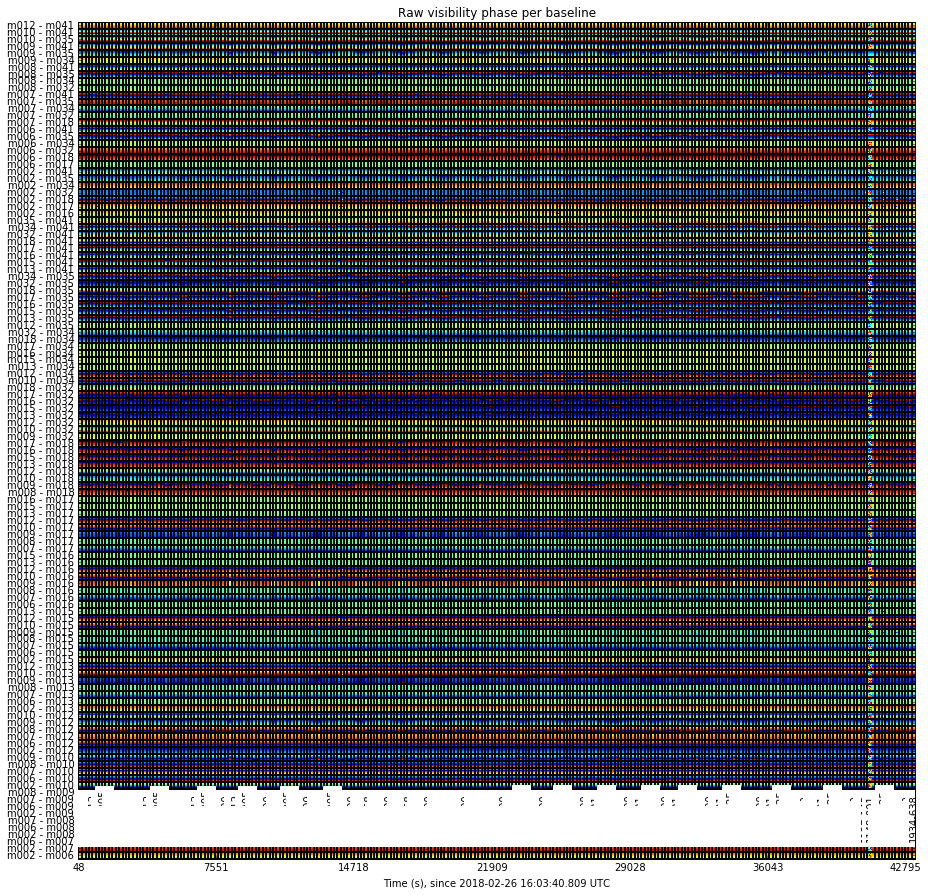

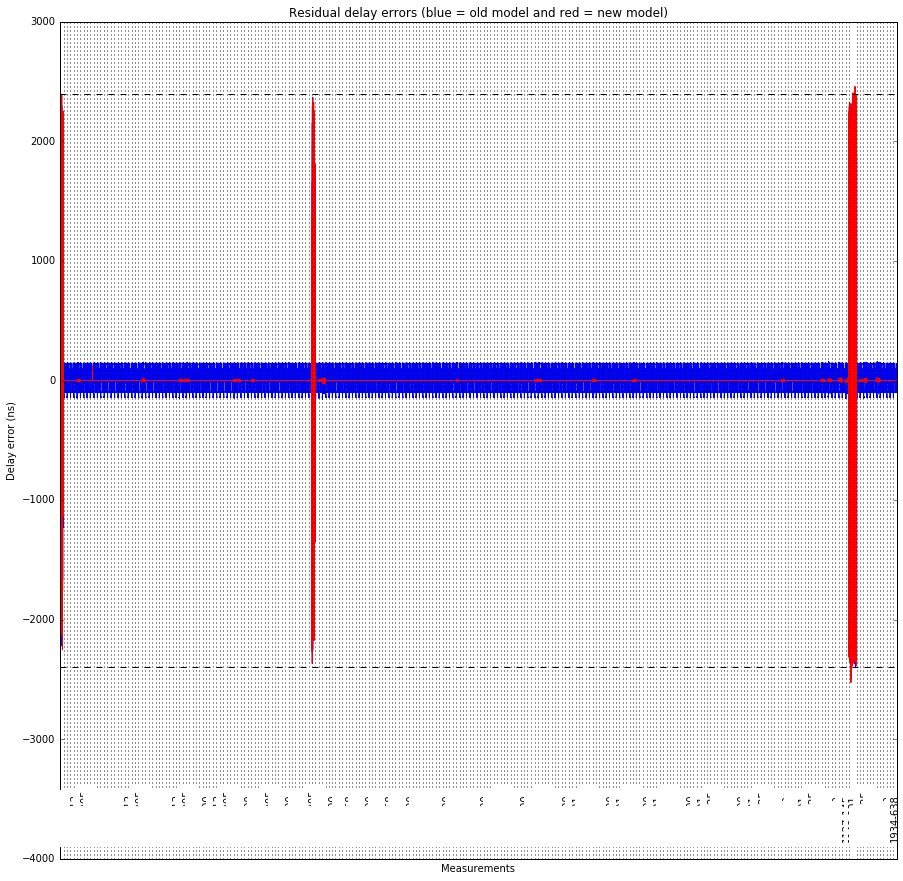

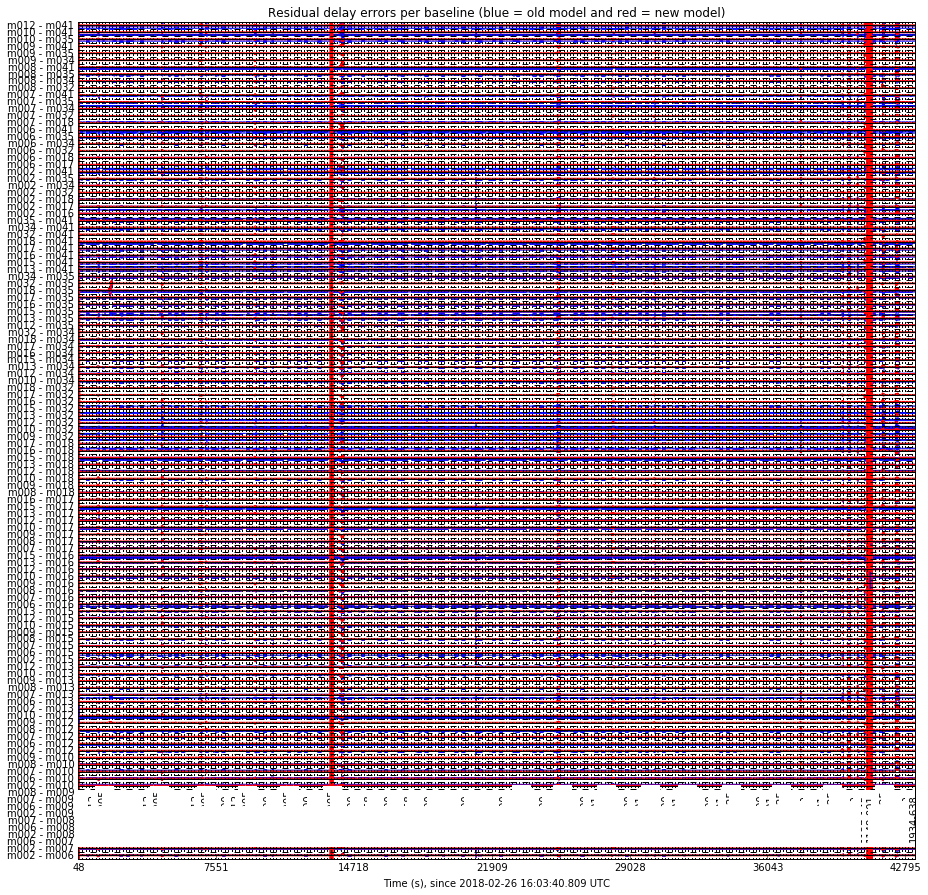

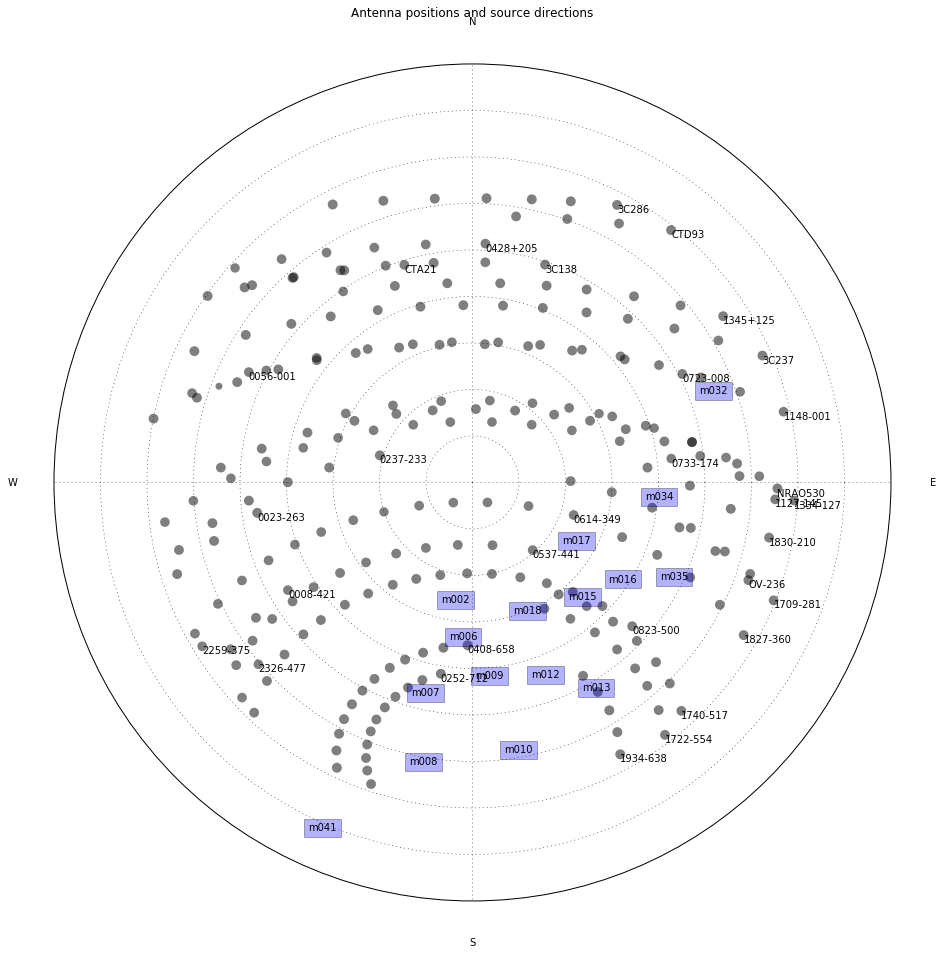

In [9]:
figure(1,figsize=(15,15))
figure(2,figsize=(15,15))
figure(3,figsize=(15,15))
figure(4,figsize=(15,15))
%run /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'H' -r $ref_ant \
 -a $ants $h5_filename



Loading and processing data...

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1519658639.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
antennas (16): m002, m006 (*ref*), m007, m008, m009, m010, m012, m013, m015, m016, m017, m018, m032, m034, m035, m041 [pol V]
baselines (120): 0-1 0-2 1-2 0-3 1-3 2-3 0-4 1-4 2-4 3-4 0-5 1-5 2-5 3-5 4-5 0-6 1-6 2-6 3-6 4-6 5-6 0-7 1-7 2-7 3-7 4-7 5-7 6-7 0-8 1-8 2-8 3-8 4-8 5-8 6-8 7-8 1-9 2-9 3-9 4-9 5-9 6-9 7-9 8-9 2-10 3-10 4-10 5-10 6-10 7-10 8-10 9-10 3-11 4-11 5-11 6-11 7-11 8-11 9-11 10-11 4-12 5-12 6-12 7-12 8-12 9-12 10-12 11-12 5-13 6-13 7-13 8-13 9-13 10-13 11-13 12-13 6-14 7-14 8-14 9-14 10-14 11-14 12-14 13-14 7-15 8-15 9-15 10-15 

scan  19 (  16 samples) 0.042 0.041 0.040 0.043 0.041 0.042 0.044 0.042 0.047 0.043 0.042 0.040 0.040 0.047 0.044 0.042 0.040 0.064 0.043 0.086 0.041 0.042 0.041 0.041 0.044 0.043 0.042 0.043 0.059 0.051 0.041 0.041 0.041 0.041 0.041 0.041 0.041 0.040 0.041 0.042 0.040 0.041 0.042 0.042 0.041 0.042 0.043 0.043 0.042 0.044 0.041 0.041 0.043 0.042 0.041 0.042 0.043 0.050 0.045 0.043 0.043 0.040 0.041 0.042 0.040 0.039 0.042 0.041 0.041 0.041 0.042 0.040 0.040 0.043 0.042 0.040 0.043 0.045 0.079 0.220 0.045 0.052 0.043 0.043 0.044 0.040 0.040 0.043 0.042 0.041 0.041 0.043 0.057 0.043 0.044 0.041 0.042 0.045 0.042 0.042 0.044 0.040 0.041 0.045 0.041 0.041 0.040 0.041 0.042 0.040 0.042 0.042 0.043 0.042 0.042 0.045 0.043 0.043 0.042 0.041 '0537-441'
scan  20 (   3 samples) skipped 'slew'
scan  21 (  16 samples) 0.058 0.059 0.058 0.061 0.059 0.056 0.062 0.058 0.061 0.062 0.060 0.059 0.058 0.063 0.061 0.059 0.061 0.057 0.059 0.066 0.059 0.062 0.059 0.059 0.063 0.062 0.060 0.061 0.057 0.056 0.

scan  43 (  15 samples) 0.022 0.023 0.022 0.024 0.023 0.022 0.024 0.024 0.023 0.025 0.024 0.023 0.023 0.023 0.024 0.024 0.023 0.023 0.025 0.025 0.024 0.024 0.024 0.023 0.025 0.025 0.024 0.024 0.023 0.023 0.021 0.022 0.023 0.023 0.023 0.024 0.022 0.022 0.023 0.023 0.023 0.024 0.024 0.022 0.023 0.025 0.025 0.024 0.024 0.024 0.024 0.024 0.024 0.024 0.023 0.024 0.024 0.022 0.023 0.024 0.024 0.023 0.023 0.024 0.023 0.023 0.024 0.023 0.023 0.024 0.024 0.024 0.023 0.023 0.024 0.023 0.023 0.024 0.024 0.024 0.024 0.024 0.024 0.024 0.025 0.023 0.023 0.024 0.024 0.023 0.023 0.024 0.023 0.024 0.024 0.023 0.024 0.024 0.024 0.024 0.024 0.023 0.023 0.024 0.023 0.022 0.022 0.023 0.023 0.023 0.024 0.023 0.024 0.023 0.024 0.025 0.024 0.024 0.023 0.024 'CTA21'
scan  44 (  10 samples) skipped 'slew'
scan  45 (  16 samples) 0.011 0.011 0.011 0.012 0.011 0.011 0.012 0.012 0.011 0.012 0.011 0.012 0.011 0.012 0.012 0.012 0.011 0.011 0.011 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.011 0.011 0.011

scan  67 (  15 samples) 0.027 0.027 0.027 0.028 0.028 0.027 0.028 0.028 0.028 0.028 0.028 0.027 0.027 0.027 0.028 0.028 0.027 0.027 0.028 0.029 0.028 0.029 0.028 0.028 0.029 0.029 0.028 0.028 0.027 0.026 0.026 0.027 0.027 0.026 0.027 0.027 0.027 0.026 0.028 0.028 0.027 0.027 0.027 0.026 0.028 0.029 0.029 0.029 0.028 0.030 0.028 0.027 0.028 0.029 0.028 0.028 0.028 0.027 0.028 0.028 0.028 0.028 0.027 0.028 0.026 0.027 0.028 0.027 0.028 0.028 0.029 0.027 0.028 0.028 0.028 0.027 0.028 0.028 0.027 0.027 0.029 0.029 0.028 0.029 0.028 0.027 0.027 0.029 0.028 0.027 0.028 0.028 0.027 0.028 0.028 0.027 0.028 0.028 0.028 0.028 0.027 0.027 0.027 0.028 0.027 0.027 0.027 0.027 0.027 0.027 0.028 0.028 0.029 0.028 0.028 0.029 0.028 0.028 0.028 0.028 '0237-233'
scan  68 (   7 samples) skipped 'slew'
scan  69 (  15 samples) 0.029 0.029 0.029 0.031 0.030 0.029 0.031 0.031 0.030 0.032 0.030 0.030 0.030 0.031 0.031 0.030 0.031 0.029 0.031 0.032 0.030 0.031 0.031 0.030 0.031 0.031 0.031 0.032 0.029 0.029 0.

scan  89 (  16 samples) 0.030 0.030 0.030 0.030 0.031 0.029 0.031 0.029 0.029 0.031 0.030 0.029 0.030 0.031 0.031 0.031 0.029 0.030 0.031 0.029 0.030 0.031 0.031 0.029 0.031 0.030 0.031 0.029 0.028 0.029 0.028 0.029 0.028 0.028 0.030 0.030 0.029 0.028 0.030 0.029 0.030 0.028 0.030 0.029 0.030 0.031 0.032 0.030 0.030 0.031 0.032 0.029 0.030 0.030 0.029 0.030 0.031 0.029 0.028 0.030 0.030 0.030 0.029 0.031 0.029 0.029 0.030 0.030 0.029 0.031 0.031 0.030 0.032 0.031 0.032 0.031 0.028 0.031 0.032 0.027 0.030 0.030 0.029 0.032 0.030 0.030 0.029 0.030 0.030 0.030 0.029 0.030 0.031 0.031 0.031 0.030 0.030 0.032 0.030 0.029 0.029 0.030 0.029 0.030 0.030 0.028 0.028 0.030 0.030 0.029 0.031 0.031 0.031 0.029 0.032 0.031 0.031 0.031 0.030 0.029 '3C237'
scan  90 (  11 samples) skipped 'slew'
scan  91 (  16 samples) 0.028 0.028 0.028 0.028 0.028 0.028 0.029 0.028 0.028 0.029 0.029 0.028 0.026 0.028 0.029 0.028 0.028 0.027 0.028 0.029 0.028 0.029 0.028 0.027 0.029 0.029 0.029 0.029 0.028 0.027 0.026

scan 113 (  15 samples) 0.068 0.062 0.038 0.050 0.054 0.048 0.084 0.088 0.080 0.095 0.066 0.070 0.065 0.053 0.074 0.077 0.082 0.073 0.057 0.083 0.093 0.065 0.071 0.062 0.053 0.080 0.061 0.074 0.050 0.057 0.048 0.041 0.059 0.048 0.046 0.049 0.057 0.053 0.046 0.060 0.063 0.049 0.047 0.040 0.079 0.072 0.041 0.072 0.086 0.073 0.057 0.060 0.032 0.140 0.073 0.081 0.064 0.054 0.052 0.134 0.092 0.064 0.085 0.065 0.033 0.053 0.087 0.084 0.050 0.079 0.044 0.043 0.036 0.063 0.051 0.063 0.084 0.042 0.059 0.051 0.094 0.083 0.079 0.054 0.051 0.045 0.038 0.065 0.062 0.058 0.041 0.061 0.053 0.086 0.073 0.073 0.053 0.077 0.048 0.091 0.068 0.081 0.050 0.082 0.092 0.064 0.072 0.049 0.072 0.076 0.057 0.047 0.061 0.049 0.063 0.092 0.061 0.077 0.056 0.070 '3C237'
scan 114 (   4 samples) skipped 'slew'
scan 115 (  15 samples) 0.036 0.034 0.035 0.036 0.034 0.035 0.037 0.036 0.035 0.037 0.034 0.035 0.035 0.035 0.037 0.036 0.034 0.034 0.036 0.038 0.036 0.037 0.036 0.035 0.036 0.036 0.037 0.035 0.035 0.034 0.035

scan 137 (  15 samples) 0.027 0.028 0.027 0.027 0.029 0.028 0.029 0.028 0.028 0.027 0.027 0.026 0.027 0.030 0.028 0.027 0.029 0.027 0.027 0.028 0.027 0.027 0.027 0.028 0.029 0.029 0.029 0.029 0.027 0.027 0.027 0.027 0.027 0.028 0.028 0.027 0.028 0.027 0.026 0.026 0.027 0.026 0.028 0.026 0.028 0.029 0.029 0.028 0.028 0.029 0.028 0.028 0.028 0.027 0.027 0.027 0.029 0.028 0.028 0.027 0.028 0.026 0.027 0.027 0.027 0.026 0.028 0.027 0.028 0.028 0.028 0.026 0.027 0.027 0.027 0.029 0.028 0.029 0.027 0.028 0.029 0.030 0.027 0.029 0.028 0.026 0.027 0.028 0.027 0.028 0.027 0.029 0.026 0.029 0.028 0.027 0.029 0.027 0.028 0.027 0.027 0.026 0.027 0.028 0.027 0.028 0.027 0.027 0.027 0.027 0.028 0.028 0.029 0.026 0.027 0.030 0.028 0.028 0.028 0.027 '3C237'
scan 138 (   4 samples) skipped 'slew'
scan 139 (  16 samples) 0.034 0.033 0.034 0.035 0.033 0.033 0.036 0.035 0.034 0.035 0.033 0.034 0.032 0.035 0.036 0.035 0.033 0.033 0.034 0.035 0.034 0.035 0.034 0.035 0.034 0.035 0.034 0.034 0.033 0.032 0.032

scan 161 (  15 samples) 0.032 0.032 0.032 0.032 0.032 0.032 0.034 0.032 0.031 0.033 0.032 0.031 0.031 0.032 0.033 0.032 0.032 0.036 0.033 0.034 0.031 0.034 0.033 0.032 0.033 0.034 0.032 0.034 0.032 0.031 0.031 0.032 0.031 0.030 0.032 0.032 0.031 0.032 0.031 0.033 0.031 0.036 0.033 0.031 0.034 0.034 0.034 0.033 0.037 0.035 0.031 0.034 0.033 0.033 0.032 0.040 0.034 0.031 0.033 0.034 0.033 0.031 0.038 0.036 0.032 0.038 0.034 0.036 0.032 0.035 0.033 0.031 0.033 0.033 0.032 0.034 0.053 0.042 0.034 0.039 0.036 0.043 0.060 0.036 0.033 0.031 0.031 0.033 0.032 0.032 0.032 0.034 0.032 0.033 0.033 0.032 0.032 0.033 0.031 0.033 0.033 0.032 0.032 0.034 0.032 0.035 0.031 0.032 0.035 0.033 0.032 0.032 0.034 0.033 0.033 0.036 0.033 0.033 0.032 0.032 '0823-500'
scan 162 (   9 samples) skipped 'slew'
scan 163 (  16 samples) 0.027 0.026 0.027 0.028 0.027 0.026 0.028 0.028 0.026 0.028 0.027 0.026 0.026 0.027 0.028 0.026 0.028 0.025 0.027 0.027 0.028 0.028 0.027 0.027 0.028 0.029 0.026 0.029 0.027 0.027 0.

scan 183 (  15 samples) 0.030 0.031 0.031 0.032 0.032 0.032 0.034 0.032 0.031 0.033 0.032 0.031 0.032 0.032 0.034 0.031 0.032 0.031 0.031 0.033 0.030 0.033 0.031 0.032 0.033 0.034 0.032 0.032 0.031 0.030 0.030 0.032 0.031 0.031 0.031 0.031 0.030 0.031 0.031 0.032 0.031 0.030 0.032 0.030 0.032 0.034 0.032 0.033 0.033 0.033 0.031 0.032 0.033 0.032 0.032 0.032 0.032 0.031 0.032 0.032 0.032 0.031 0.031 0.033 0.031 0.031 0.032 0.031 0.032 0.031 0.033 0.030 0.031 0.033 0.032 0.032 0.032 0.033 0.032 0.034 0.033 0.032 0.032 0.032 0.032 0.031 0.031 0.032 0.032 0.032 0.032 0.032 0.031 0.034 0.033 0.032 0.032 0.033 0.032 0.033 0.031 0.031 0.032 0.032 0.031 0.031 0.031 0.031 0.031 0.030 0.032 0.032 0.033 0.033 0.032 0.032 0.032 0.033 0.031 0.032 '0823-500'
scan 184 (  15 samples) skipped 'slew'
scan 185 (  15 samples) 0.027 0.026 0.025 0.027 0.028 0.026 0.028 0.027 0.025 0.026 0.026 0.026 0.025 0.028 0.029 0.026 0.027 0.026 0.026 0.027 0.027 0.028 0.026 0.026 0.028 0.029 0.027 0.029 0.026 0.026 0.

scan 205 (  16 samples) 0.076 0.071 0.072 0.077 0.077 0.072 0.075 0.077 0.076 0.078 0.080 0.075 0.072 0.077 0.076 0.080 0.074 0.075 0.078 0.079 0.074 0.081 0.075 0.075 0.078 0.081 0.079 0.076 0.074 0.073 0.071 0.076 0.075 0.073 0.074 0.077 0.075 0.071 0.074 0.077 0.074 0.074 0.078 0.073 0.079 0.077 0.078 0.079 0.078 0.079 0.081 0.076 0.076 0.076 0.080 0.076 0.078 0.078 0.072 0.076 0.075 0.075 0.076 0.076 0.072 0.074 0.077 0.076 0.076 0.076 0.080 0.075 0.075 0.075 0.078 0.076 0.077 0.079 0.077 0.081 0.077 0.076 0.073 0.079 0.080 0.074 0.074 0.077 0.077 0.075 0.077 0.076 0.073 0.077 0.074 0.076 0.075 0.076 0.076 0.077 0.079 0.073 0.076 0.075 0.078 0.073 0.073 0.074 0.075 0.074 0.077 0.076 0.079 0.077 0.077 0.077 0.081 0.079 0.078 0.079 '0733-174'
scan 206 (   8 samples) skipped 'slew'
scan 207 (  15 samples) 0.031 0.031 0.031 0.032 0.032 0.032 0.033 0.032 0.031 0.034 0.032 0.032 0.031 0.031 0.033 0.033 0.032 0.031 0.032 0.032 0.032 0.033 0.033 0.031 0.033 0.033 0.031 0.031 0.030 0.030 0.

scan 229 (  15 samples) 0.031 0.032 0.031 0.032 0.031 0.031 0.033 0.032 0.032 0.033 0.033 0.031 0.031 0.033 0.032 0.033 0.031 0.030 0.032 0.032 0.031 0.033 0.031 0.032 0.033 0.033 0.033 0.032 0.032 0.030 0.029 0.032 0.031 0.031 0.030 0.031 0.029 0.030 0.031 0.031 0.032 0.032 0.031 0.031 0.032 0.033 0.033 0.033 0.032 0.034 0.033 0.032 0.032 0.033 0.033 0.033 0.033 0.033 0.031 0.033 0.032 0.032 0.032 0.033 0.031 0.030 0.033 0.031 0.032 0.032 0.032 0.032 0.030 0.033 0.032 0.031 0.032 0.033 0.031 0.032 0.034 0.033 0.032 0.033 0.032 0.031 0.030 0.032 0.032 0.031 0.032 0.032 0.031 0.032 0.032 0.031 0.032 0.033 0.032 0.032 0.030 0.031 0.031 0.031 0.031 0.031 0.031 0.032 0.032 0.031 0.032 0.032 0.033 0.032 0.032 0.032 0.032 0.032 0.032 0.032 '0823-500'
scan 230 (  12 samples) skipped 'slew'
scan 231 (  15 samples) 0.026 0.026 0.025 0.027 0.027 0.026 0.028 0.027 0.027 0.028 0.026 0.027 0.025 0.027 0.027 0.027 0.028 0.027 0.027 0.029 0.027 0.028 0.027 0.026 0.028 0.027 0.027 0.028 0.026 0.026 0.

scan 251 (  15 samples) 0.031 0.034 0.032 0.032 0.032 0.031 0.032 0.030 0.031 0.031 0.032 0.031 0.031 0.033 0.032 0.031 0.030 0.031 0.032 0.032 0.032 0.032 0.032 0.033 0.033 0.033 0.033 0.033 0.033 0.030 0.034 0.031 0.031 0.031 0.030 0.033 0.031 0.031 0.032 0.032 0.031 0.032 0.033 0.032 0.032 0.033 0.034 0.032 0.033 0.034 0.033 0.031 0.032 0.033 0.032 0.032 0.033 0.032 0.031 0.032 0.032 0.032 0.031 0.033 0.031 0.034 0.033 0.032 0.032 0.033 0.034 0.033 0.032 0.032 0.032 0.034 0.034 0.034 0.033 0.032 0.032 0.032 0.035 0.033 0.032 0.031 0.031 0.032 0.032 0.031 0.032 0.032 0.033 0.034 0.031 0.031 0.033 0.033 0.032 0.033 0.031 0.030 0.032 0.033 0.031 0.031 0.031 0.031 0.032 0.032 0.032 0.033 0.033 0.033 0.033 0.034 0.032 0.032 0.030 0.032 '0823-500'
scan 252 (  11 samples) skipped 'slew'
scan 253 (  15 samples) 0.026 0.025 0.025 0.028 0.026 0.026 0.027 0.027 0.026 0.027 0.026 0.026 0.025 0.027 0.026 0.027 0.027 0.026 0.027 0.029 0.027 0.027 0.027 0.026 0.028 0.028 0.026 0.028 0.025 0.027 0.

scan 275 (  15 samples) 0.033 0.030 0.031 0.034 0.030 0.032 0.034 0.035 0.034 0.035 0.031 0.031 0.031 0.031 0.034 0.032 0.031 0.030 0.032 0.035 0.032 0.034 0.033 0.032 0.033 0.037 0.032 0.033 0.032 0.031 0.030 0.032 0.035 0.032 0.030 0.032 0.030 0.030 0.031 0.035 0.031 0.031 0.032 0.031 0.032 0.033 0.036 0.032 0.032 0.034 0.032 0.031 0.032 0.037 0.033 0.032 0.032 0.031 0.031 0.033 0.035 0.031 0.031 0.032 0.031 0.031 0.032 0.031 0.034 0.033 0.035 0.032 0.033 0.035 0.035 0.034 0.035 0.038 0.038 0.036 0.039 0.037 0.044 0.037 0.033 0.031 0.031 0.033 0.031 0.031 0.033 0.035 0.031 0.032 0.034 0.032 0.034 0.036 0.032 0.031 0.032 0.031 0.033 0.036 0.031 0.031 0.031 0.032 0.040 0.030 0.031 0.035 0.037 0.033 0.037 0.047 0.035 0.038 0.032 0.031 '0823-500'
scan 276 (   9 samples) skipped 'slew'
scan 277 (  16 samples) 0.026 0.027 0.026 0.027 0.026 0.026 0.027 0.027 0.026 0.027 0.027 0.027 0.025 0.028 0.028 0.028 0.026 0.026 0.027 0.029 0.027 0.027 0.027 0.026 0.028 0.028 0.027 0.027 0.025 0.026 0.

scan 297 (  16 samples) 0.077 0.073 0.074 0.077 0.077 0.080 0.084 0.083 0.076 0.077 0.079 0.074 0.079 0.077 0.079 0.080 0.079 0.075 0.076 0.088 0.075 0.079 0.080 0.076 0.078 0.079 0.080 0.079 0.082 0.078 0.072 0.075 0.075 0.074 0.076 0.078 0.075 0.075 0.079 0.078 0.075 0.077 0.078 0.075 0.077 0.079 0.083 0.080 0.078 0.081 0.077 0.082 0.079 0.080 0.078 0.078 0.080 0.081 0.076 0.081 0.078 0.075 0.078 0.078 0.076 0.074 0.078 0.079 0.080 0.078 0.082 0.080 0.079 0.084 0.082 0.082 0.075 0.082 0.078 0.081 0.082 0.081 0.077 0.080 0.079 0.076 0.075 0.082 0.077 0.077 0.080 0.076 0.079 0.079 0.078 0.076 0.081 0.080 0.078 0.075 0.080 0.073 0.080 0.077 0.076 0.076 0.076 0.077 0.078 0.077 0.079 0.081 0.079 0.076 0.082 0.082 0.079 0.077 0.079 0.075 '0733-174'
scan 298 (   4 samples) skipped 'slew'
scan 299 (  16 samples) 0.031 0.030 0.030 0.032 0.031 0.032 0.032 0.031 0.031 0.033 0.032 0.031 0.030 0.033 0.032 0.032 0.031 0.031 0.032 0.033 0.032 0.032 0.030 0.031 0.033 0.033 0.032 0.033 0.031 0.030 0.

scan 321 (  15 samples) 0.035 0.034 0.033 0.036 0.035 0.034 0.036 0.035 0.035 0.036 0.035 0.034 0.034 0.034 0.036 0.034 0.034 0.035 0.036 0.035 0.035 0.036 0.035 0.035 0.036 0.035 0.036 0.035 0.034 0.033 0.033 0.035 0.035 0.034 0.034 0.034 0.035 0.033 0.035 0.035 0.034 0.034 0.035 0.034 0.036 0.036 0.037 0.036 0.036 0.037 0.035 0.035 0.035 0.036 0.035 0.036 0.035 0.033 0.034 0.035 0.037 0.036 0.035 0.036 0.034 0.034 0.036 0.036 0.037 0.035 0.037 0.035 0.035 0.036 0.036 0.035 0.035 0.035 0.035 0.035 0.036 0.035 0.034 0.036 0.035 0.035 0.035 0.037 0.036 0.036 0.037 0.036 0.035 0.035 0.035 0.035 0.036 0.034 0.036 0.035 0.034 0.034 0.035 0.035 0.035 0.033 0.035 0.035 0.034 0.034 0.036 0.037 0.036 0.035 0.037 0.036 0.036 0.035 0.035 0.034 '0723-008'
scan 322 (   3 samples) skipped 'slew'
scan 323 (  15 samples) 0.079 0.076 0.073 0.080 0.078 0.078 0.083 0.078 0.080 0.082 0.081 0.078 0.074 0.077 0.084 0.081 0.079 0.077 0.078 0.093 0.077 0.081 0.081 0.082 0.081 0.082 0.080 0.085 0.075 0.080 0.

scan 343 (  16 samples) 0.027 0.027 0.028 0.028 0.028 0.027 0.029 0.029 0.039 0.030 0.027 0.027 0.028 0.028 0.029 0.028 0.028 0.035 0.028 0.035 0.029 0.029 0.029 0.031 0.029 0.034 0.029 0.034 0.028 0.027 0.029 0.027 0.031 0.027 0.028 0.028 0.027 0.038 0.028 0.039 0.028 0.035 0.030 0.028 0.032 0.029 0.034 0.028 0.031 0.030 0.028 0.028 0.029 0.033 0.028 0.031 0.030 0.027 0.028 0.029 0.050 0.028 0.044 0.031 0.028 0.036 0.031 0.030 0.028 0.036 0.030 0.028 0.030 0.029 0.029 0.032 0.063 0.041 0.029 0.036 0.031 0.033 0.061 0.038 0.029 0.027 0.028 0.028 0.028 0.028 0.028 0.030 0.028 0.029 0.028 0.028 0.028 0.029 0.028 0.028 0.027 0.028 0.028 0.029 0.028 0.030 0.039 0.039 0.062 0.028 0.028 0.029 0.029 0.028 0.042 0.070 0.030 0.029 0.028 0.028 '1740-517'
scan 344 (   9 samples) skipped 'slew'
scan 345 (  16 samples) 0.084 0.079 0.081 0.083 0.082 0.079 0.084 0.087 0.086 0.087 0.082 0.082 0.080 0.083 0.083 0.081 0.083 0.078 0.082 0.098 0.080 0.085 0.080 0.082 0.084 0.094 0.086 0.093 0.081 0.083 0.

scan 367 (  15 samples) 0.026 0.027 0.026 0.027 0.027 0.027 0.029 0.028 0.027 0.029 0.027 0.027 0.026 0.027 0.029 0.028 0.027 0.027 0.028 0.029 0.028 0.028 0.028 0.027 0.028 0.029 0.028 0.027 0.027 0.026 0.026 0.027 0.028 0.027 0.026 0.027 0.026 0.026 0.027 0.028 0.026 0.026 0.027 0.026 0.027 0.028 0.030 0.028 0.027 0.028 0.027 0.027 0.028 0.028 0.027 0.028 0.029 0.027 0.027 0.028 0.028 0.026 0.027 0.028 0.026 0.026 0.027 0.027 0.027 0.028 0.028 0.027 0.027 0.028 0.028 0.027 0.028 0.029 0.028 0.027 0.027 0.027 0.027 0.028 0.028 0.026 0.027 0.028 0.028 0.027 0.027 0.028 0.026 0.028 0.028 0.027 0.028 0.028 0.028 0.027 0.027 0.026 0.027 0.027 0.027 0.027 0.026 0.027 0.027 0.026 0.027 0.027 0.028 0.028 0.029 0.029 0.029 0.027 0.027 0.027 '1740-517'
scan 368 (   4 samples) skipped 'slew'
scan 369 (  15 samples) 0.028 0.027 0.027 0.028 0.028 0.027 0.030 0.031 0.065 0.030 0.027 0.027 0.026 0.028 0.030 0.028 0.029 0.042 0.028 0.034 0.027 0.028 0.028 0.030 0.028 0.035 0.028 0.030 0.027 0.027 0.

scan 391 (  15 samples) 0.035 0.035 0.036 0.037 0.038 0.038 0.042 0.040 0.041 0.040 0.036 0.034 0.035 0.040 0.041 0.039 0.039 0.045 0.037 0.040 0.038 0.038 0.037 0.040 0.038 0.039 0.038 0.040 0.037 0.036 0.039 0.037 0.038 0.036 0.037 0.038 0.037 0.050 0.037 0.042 0.037 0.046 0.044 0.036 0.040 0.039 0.041 0.038 0.040 0.041 0.036 0.037 0.037 0.043 0.036 0.041 0.040 0.037 0.038 0.038 0.045 0.036 0.047 0.040 0.038 0.047 0.040 0.044 0.036 0.047 0.042 0.037 0.040 0.040 0.039 0.042 0.051 0.043 0.037 0.040 0.037 0.039 0.049 0.045 0.038 0.036 0.036 0.038 0.037 0.036 0.037 0.038 0.036 0.037 0.034 0.037 0.037 0.037 0.036 0.037 0.035 0.037 0.036 0.038 0.035 0.039 0.045 0.049 0.047 0.037 0.037 0.037 0.038 0.038 0.044 0.049 0.038 0.038 0.037 0.038 '1722-554'
scan 392 (   5 samples) skipped 'slew'
scan 393 (  15 samples) 0.025 0.026 0.025 0.026 0.026 0.025 0.027 0.027 0.027 0.027 0.026 0.025 0.025 0.027 0.026 0.026 0.026 0.025 0.026 0.027 0.026 0.027 0.026 0.026 0.027 0.027 0.026 0.027 0.025 0.025 0.

scan 413 (  16 samples) 0.067 0.068 0.065 0.067 0.069 0.067 0.071 0.065 0.070 0.074 0.069 0.071 0.064 0.067 0.076 0.065 0.066 0.069 0.069 0.067 0.067 0.068 0.069 0.071 0.074 0.072 0.069 0.065 0.064 0.065 0.065 0.066 0.067 0.064 0.064 0.070 0.069 0.066 0.066 0.068 0.066 0.066 0.069 0.064 0.067 0.070 0.071 0.071 0.068 0.074 0.070 0.073 0.070 0.067 0.068 0.064 0.070 0.070 0.064 0.067 0.069 0.069 0.069 0.069 0.065 0.066 0.068 0.068 0.070 0.067 0.067 0.070 0.067 0.072 0.068 0.064 0.068 0.070 0.071 0.068 0.072 0.068 0.066 0.065 0.072 0.066 0.068 0.069 0.068 0.069 0.069 0.070 0.065 0.067 0.069 0.070 0.071 0.072 0.070 0.066 0.066 0.066 0.065 0.067 0.066 0.066 0.065 0.066 0.065 0.067 0.070 0.070 0.070 0.070 0.068 0.070 0.069 0.070 0.071 0.067 '1334-127'
scan 414 (   5 samples) skipped 'slew'
scan 415 (  15 samples) 0.033 0.033 0.032 0.033 0.033 0.031 0.035 0.033 0.032 0.034 0.033 0.032 0.032 0.033 0.033 0.031 0.033 0.031 0.032 0.034 0.033 0.034 0.032 0.033 0.034 0.033 0.034 0.036 0.032 0.031 0.

scan 437 (  15 samples) 0.035 0.034 0.034 0.036 0.034 0.036 0.038 0.036 0.036 0.036 0.035 0.033 0.034 0.034 0.035 0.034 0.034 0.033 0.035 0.035 0.034 0.034 0.036 0.033 0.038 0.036 0.036 0.035 0.033 0.033 0.032 0.036 0.037 0.034 0.033 0.033 0.035 0.032 0.035 0.035 0.033 0.033 0.034 0.033 0.035 0.036 0.037 0.036 0.035 0.037 0.038 0.037 0.036 0.037 0.034 0.034 0.036 0.033 0.033 0.036 0.036 0.035 0.035 0.036 0.034 0.035 0.036 0.035 0.035 0.034 0.035 0.034 0.034 0.036 0.034 0.033 0.035 0.035 0.035 0.033 0.038 0.036 0.037 0.034 0.036 0.034 0.035 0.037 0.035 0.035 0.035 0.037 0.034 0.037 0.035 0.035 0.034 0.035 0.035 0.033 0.035 0.033 0.035 0.036 0.034 0.034 0.035 0.034 0.034 0.034 0.035 0.036 0.037 0.035 0.038 0.037 0.036 0.035 0.035 0.035 '1127-145'
scan 438 (   3 samples) skipped 'slew'
scan 439 (  15 samples) 0.061 0.058 0.055 0.060 0.059 0.057 0.056 0.062 0.057 0.059 0.059 0.058 0.055 0.058 0.059 0.056 0.060 0.055 0.060 0.057 0.058 0.063 0.059 0.057 0.060 0.064 0.061 0.063 0.058 0.057 0.

scan 459 (  16 samples) 0.021 0.021 0.022 0.021 0.020 0.023 0.023 0.024 0.022 0.023 0.020 0.021 0.021 0.022 0.022 0.022 0.022 0.025 0.023 0.023 0.022 0.022 0.021 0.022 0.021 0.022 0.023 0.022 0.020 0.023 0.020 0.021 0.022 0.021 0.022 0.021 0.022 0.022 0.021 0.023 0.020 0.020 0.022 0.021 0.021 0.021 0.023 0.021 0.022 0.024 0.023 0.021 0.021 0.023 0.021 0.021 0.022 0.020 0.021 0.023 0.022 0.020 0.021 0.021 0.020 0.020 0.021 0.021 0.021 0.022 0.022 0.021 0.021 0.021 0.023 0.022 0.023 0.021 0.020 0.022 0.024 0.023 0.021 0.023 0.022 0.021 0.021 0.022 0.021 0.021 0.021 0.021 0.020 0.024 0.022 0.021 0.023 0.022 0.021 0.022 0.022 0.021 0.022 0.020 0.020 0.021 0.021 0.020 0.021 0.023 0.021 0.021 0.021 0.022 0.022 0.023 0.022 0.021 0.021 0.022 '1830-210'
scan 460 (   2 samples) skipped 'slew'
scan 461 (  16 samples) 0.049 0.045 0.042 0.052 0.052 0.050 0.052 0.053 0.059 0.049 0.048 0.051 0.050 0.050 0.049 0.059 0.051 0.054 0.057 0.055 0.051 0.050 0.050 0.048 0.051 0.055 0.049 0.057 0.048 0.051 0.

scan 483 (  15 samples) 0.026 0.026 0.026 0.027 0.027 0.027 0.029 0.032 0.034 0.029 0.027 0.026 0.026 0.027 0.028 0.026 0.032 0.032 0.027 0.058 0.028 0.027 0.027 0.028 0.027 0.031 0.027 0.032 0.026 0.027 0.027 0.026 0.033 0.026 0.028 0.026 0.027 0.029 0.027 0.043 0.026 0.050 0.031 0.027 0.027 0.027 0.033 0.027 0.032 0.028 0.027 0.027 0.027 0.044 0.026 0.041 0.029 0.027 0.027 0.029 0.051 0.026 0.064 0.034 0.033 0.042 0.029 0.039 0.027 0.037 0.030 0.028 0.028 0.027 0.030 0.034 0.060 0.033 0.028 0.030 0.029 0.039 0.053 0.032 0.027 0.025 0.026 0.027 0.027 0.026 0.028 0.027 0.026 0.028 0.028 0.026 0.027 0.027 0.027 0.027 0.029 0.031 0.028 0.030 0.026 0.031 0.028 0.028 0.030 0.026 0.026 0.028 0.028 0.027 0.038 0.049 0.029 0.027 0.025 0.028 '1740-517'
scan 484 (   4 samples) skipped 'slew'
scan 485 (  15 samples) 0.025 0.025 0.053 0.025 0.026 0.026 0.027 0.045 0.050 0.029 0.025 0.025 0.025 0.025 0.027 0.025 0.054 0.057 0.028 0.051 0.026 0.025 0.028 0.027 0.026 0.032 0.026 0.044 0.024 0.026 0.

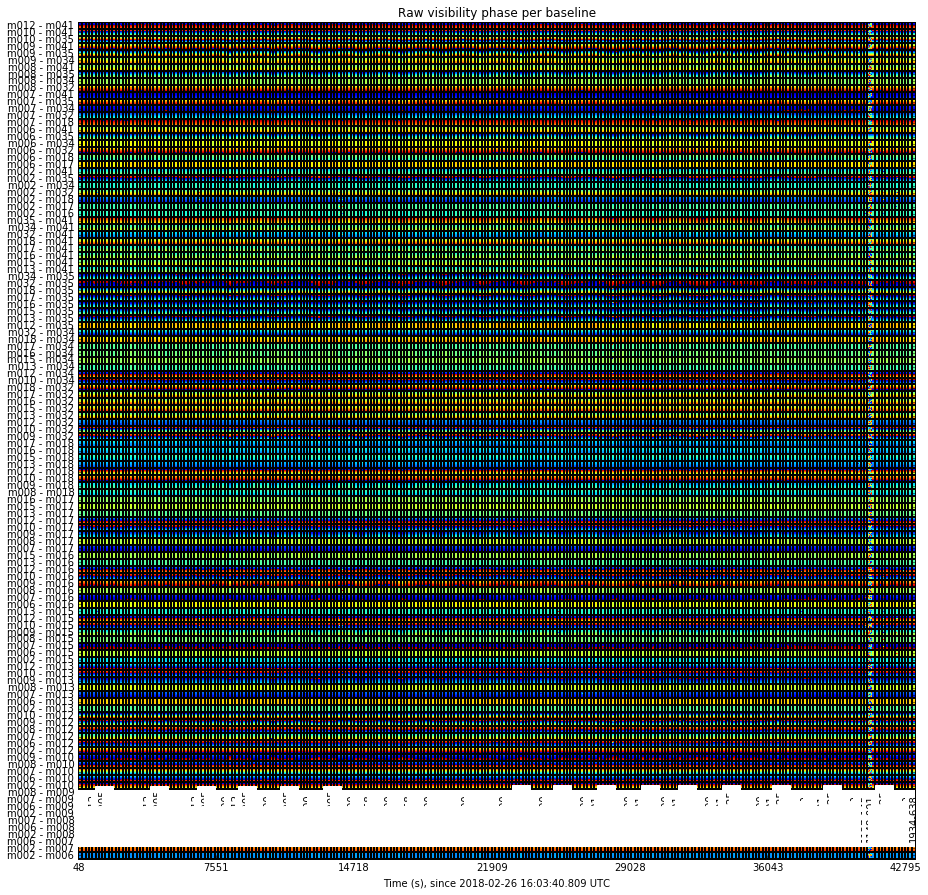

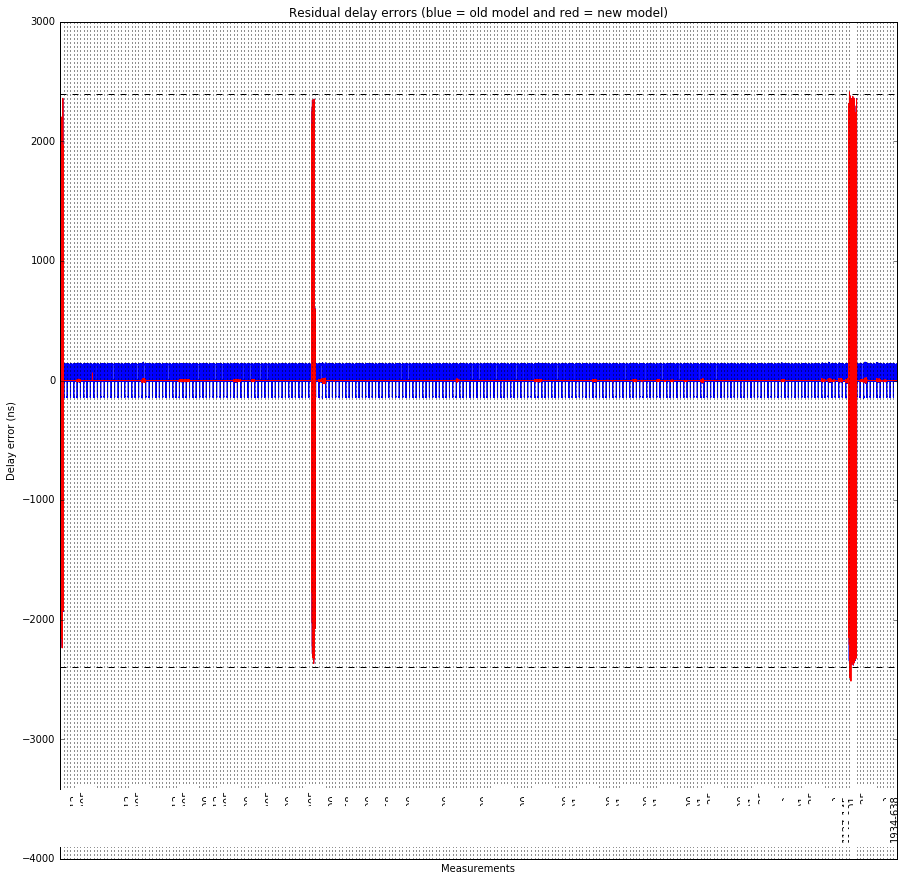

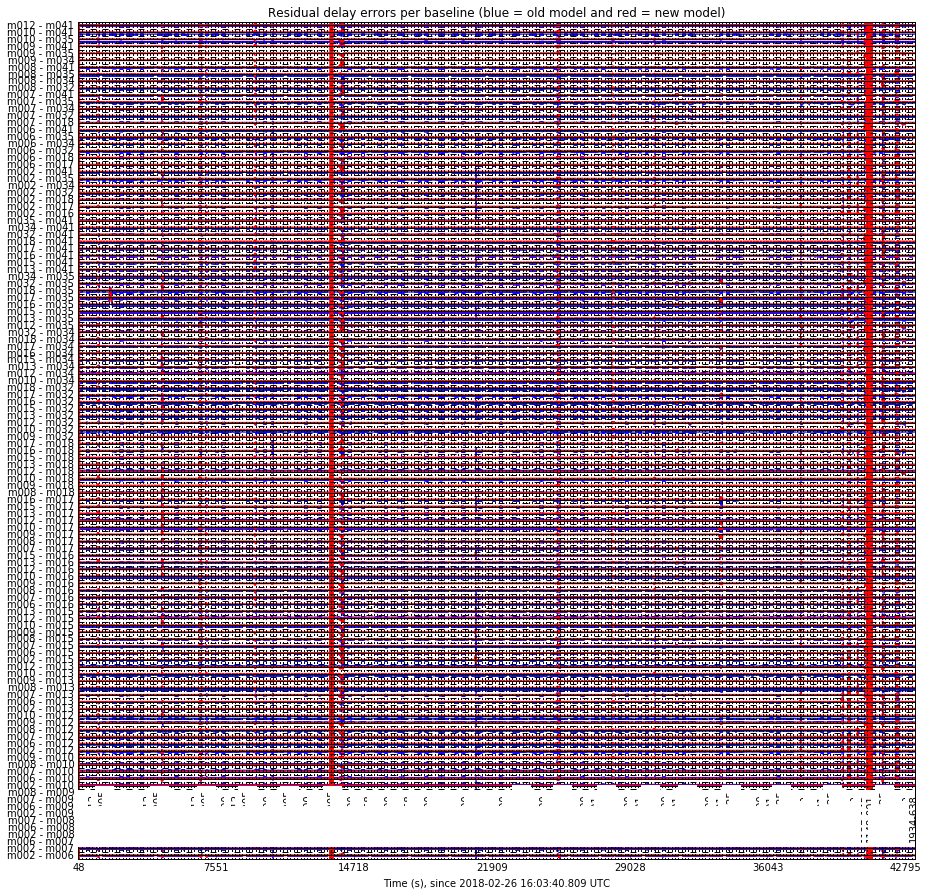

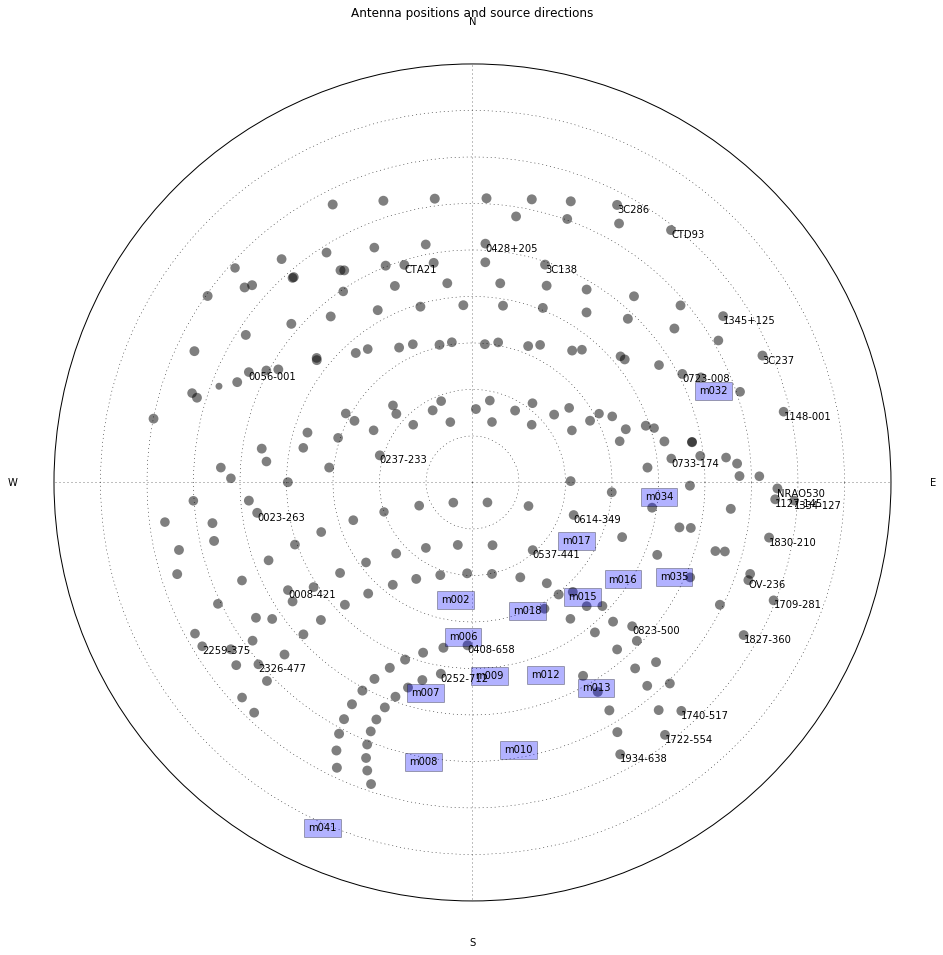

In [10]:
figure(1,figsize=(15,15))
figure(2,figsize=(15,15))
figure(3,figsize=(15,15))
figure(4,figsize=(15,15))
%run -e /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'V' -r $ref_ant \
 -a $ants $h5_filename


In [11]:
res_h = !python /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'H' -r $ref_ant \
  -a $ants  $h5_filename
print "Done H"

Done H


In [12]:
res_v = !python /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'V' -r $ref_ant \
  -a $ants $h5_filename
print "Done V"

Done V


In [13]:
delays_h = {}
for i,r in enumerate(res_h):
    if r.startswith('Antenna'):
        ant = r[8:12]
        delays_h[ant] = {}
        delays_h[ant]['E'] = float(res_h[i+2].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['N'] = float(res_h[i+3].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['U'] = float(res_h[i+4].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['D'] = float(res_h[i+5].split(':')[1].lstrip().split(' ')[0])
delays_h

{'m002': {'D': 5871.47, 'E': -32.104, 'N': -224.237, 'U': 1.252},
 'm006': {'D': 5880.202, 'E': -18.223, 'N': -295.428, 'U': 1.793},
 'm007': {'D': 5888.641, 'E': -89.581, 'N': -402.73, 'U': 2.371},
 'm008': {'D': 5874.911, 'E': -93.521, 'N': -535.026, 'U': 3.048},
 'm009': {'D': 5850.392, 'E': 32.364, 'N': -371.056, 'U': 2.741},
 'm010': {'D': 5881.438, 'E': 88.104, 'N': -511.872, 'U': 3.774},
 'm012': {'D': 5863.332, 'E': 140.026, 'N': -368.269, 'U': 3.052},
 'm013': {'D': 5863.474, 'E': 236.798, 'N': -393.461, 'U': 3.718},
 'm015': {'D': 5916.983, 'E': 210.653, 'N': -219.142, 'U': 2.342},
 'm016': {'D': 5813.886, 'E': 288.158, 'N': -185.875, 'U': 2.485},
 'm017': {'D': 5875.203, 'E': 199.633, 'N': -112.264, 'U': 1.561},
 'm018': {'D': 5867.229, 'E': 105.736, 'N': -245.87, 'U': 2.13},
 'm032': {'D': 5864.854, 'E': 461.288, 'N': 175.506, 'U': -0.04},
 'm034': {'D': 5859.104, 'E': 357.817, 'N': -28.306, 'U': 1.577},
 'm035': {'D': 5855.374, 'E': 386.162, 'N': -180.893, 'U': 2.89},
 'm0

In [14]:
delays_v = {}
for i,r in enumerate(res_v):
    if r.startswith('Antenna'):
        ant = r[8:12]
        delays_v[ant] = {}
        delays_v[ant]['E'] = float(res_v[i+2].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['N'] = float(res_v[i+3].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['U'] = float(res_v[i+4].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['D'] = float(res_v[i+5].split(':')[1].lstrip().split(' ')[0])
delays_v

{'m002': {'D': 5872.221, 'E': -32.105, 'N': -224.238, 'U': 1.257},
 'm006': {'D': 5880.993, 'E': -18.223, 'N': -295.428, 'U': 1.793},
 'm007': {'D': 5889.383, 'E': -89.583, 'N': -402.73, 'U': 2.374},
 'm008': {'D': 5875.804, 'E': -93.523, 'N': -535.026, 'U': 3.05},
 'm009': {'D': 5851.152, 'E': 32.363, 'N': -371.056, 'U': 2.743},
 'm010': {'D': 5882.95, 'E': 88.101, 'N': -511.872, 'U': 3.782},
 'm012': {'D': 5864.346, 'E': 140.025, 'N': -368.268, 'U': 3.051},
 'm013': {'D': 5864.222, 'E': 236.797, 'N': -393.461, 'U': 3.72},
 'm015': {'D': 5918.599, 'E': 210.653, 'N': -219.143, 'U': 2.345},
 'm016': {'D': 5815.498, 'E': 288.166, 'N': -185.874, 'U': 2.4},
 'm017': {'D': 5875.953, 'E': 199.633, 'N': -112.264, 'U': 1.564},
 'm018': {'D': 5868.115, 'E': 105.736, 'N': -245.87, 'U': 2.131},
 'm032': {'D': 5865.584, 'E': 461.285, 'N': 175.505, 'U': -0.031},
 'm034': {'D': 5860.722, 'E': 357.818, 'N': -28.307, 'U': 1.579},
 'm035': {'D': 5856.243, 'E': 386.163, 'N': -180.893, 'U': 2.891},
 'm04

# Cross check between polarizations for derived positions

In [15]:
for a in sorted(delays_v):
    print a,
    print("diff E %06.3f") %(delays_h[a]['E'] - delays_v[a]['E']),
    print("diff N %06.3f") %(delays_h[a]['N'] - delays_v[a]['N']),
    print("diff U %06.3f") %(delays_h[a]['U'] - delays_v[a]['U']),
    print("diff D %06.3f") %(delays_h[a]['D'] - delays_v[a]['D'])
    
# expect differences between E,N and U less than 1cm and Delays less than 3m 

m002 diff E 00.001 diff N 00.001 diff U -0.005 diff D -0.751
m006 diff E 00.000 diff N 00.000 diff U 00.000 diff D -0.791
m007 diff E 00.002 diff N 00.000 diff U -0.003 diff D -0.742
m008 diff E 00.002 diff N 00.000 diff U -0.002 diff D -0.893
m009 diff E 00.001 diff N 00.000 diff U -0.002 diff D -0.760
m010 diff E 00.003 diff N 00.000 diff U -0.008 diff D -1.512
m012 diff E 00.001 diff N -0.001 diff U 00.001 diff D -1.014
m013 diff E 00.001 diff N 00.000 diff U -0.002 diff D -0.748
m015 diff E 00.000 diff N 00.001 diff U -0.003 diff D -1.616
m016 diff E -0.008 diff N -0.001 diff U 00.085 diff D -1.612
m017 diff E 00.000 diff N 00.000 diff U -0.003 diff D -0.750
m018 diff E 00.000 diff N 00.000 diff U -0.001 diff D -0.886
m032 diff E 00.003 diff N 00.001 diff U -0.009 diff D -0.730
m034 diff E -0.001 diff N 00.001 diff U -0.002 diff D -1.618
m035 diff E -0.001 diff N 00.000 diff U -0.001 diff D -0.869
m041 diff E 00.003 diff N 00.000 diff U -0.005 diff D -0.759


In [16]:
# write solutions to file
matchRe = re.findall('[0-9]{10,}', h5_filename)
filename='delay_file_'+''.join(matchRe)+'.txt'

with open(filename, 'w') as f:
    for h,v in zip(delays_h,delays_v):
        print >> f, h,v, mean([delays_h[h]['E'],delays_v[v]['E']]) , \
                    mean([delays_h[h]['N'],delays_v[v]['N']]), \
                    mean([delays_h[h]['U'],delays_v[v]['U']]), \
                    delays_h[h]['D'],delays_v[v]['D']
    f.close()

In [17]:
# sort delay file by antenna name and load antennaLOC
sample = open(filename, 'r')
sorter = csv.reader(sample, delimiter=' ')
sort = sorted(sorter, key=operator.itemgetter(1))

with open('ant_loc.csv', 'r') as f:
    tocs = f.read()

In [18]:
cols = ['Ants', 'Delay', 'East', 'North', 'UP', 'TOC']
df = pd.DataFrame(columns=cols)
for line in sort:
    p = re.compile(line[0]+',\s+\d{4}\.\d{1,3}')
    toc = float(p.search(tocs).group()[6:])
    df = df.append(pd.Series(
                             [
                                line[0],
                                line[-2],
                                line[2],
                                line[3],
                                line[4], 
                                toc
                             ], 
                              index=['Ants', 'Delay', 'East', 'North', 'UP', 'TOC']
                            ), ignore_index = True)

In [19]:
deltaTOC, deltaUP = [], []
deltaTOC.append(0)
deltaUP.append(0)
for i in range(1, len(df.TOC[1:])+1):
    deltaTOC.append(df.TOC[i] - df.TOC[i-1])
    deltaUP.append(float(df.UP[i]) - float(df.UP[i-1]))

em  = [' ' for i in range(len(deltaUP))]
df[' '] =  pd.Series(em,  index = df.index)

df['delta UP']  = pd.Series(deltaUP,  index = df.index)
df['delta TOC'] = pd.Series(deltaTOC, index = df.index)

print('\nDelay Solutions and antenna locations\n')
df


Delay Solutions and antenna locations



,Ants,Delay,East,North,UP,TOC,,delta UP,delta TOC
0,m002,5871.47,-32.1045,-224.2375,1.2545,1052.210,,0.0000,0.000
1,m006,5880.202,-18.223,-295.428,1.793,1052.590,,0.5385,0.380
2,m007,5888.641,-89.582,-402.73,2.3725,1053.092,,0.5795,0.502
3,m008,5874.911,-93.522,-535.026,3.049,1053.990,,0.6765,0.898
4,m009,5850.392,32.3635,-371.056,2.742,1053.549,,-0.3070,-0.441
5,m010,5881.438,88.1025,-511.872,3.778,1054.756,,1.0360,1.207
6,m012,5863.332,140.0255,-368.2685,3.0515,1053.730,,-0.7265,-1.026
7,m013,5863.474,236.7975,-393.461,3.719,1054.658,,0.6675,0.928
8,m015,5916.983,210.653,-219.1425,2.3435,1053.204,,-1.3755,-1.454
9,m016,5813.886,288.162,-185.8745,2.4425,1053.276,,0.0990,0.072


In [20]:
# send file to ops server to process and push to github

opsServer='ops.kat.ac.za'
rPath='/home/kat/ops_team_sw/utilities/update_delay_models'
cmd = "sshpass -p {} scp -r {} kat@{}:{}".format('kat', filename, opsServer, rPath)
system(cmd)


32512